# Predicting Insurance Premiums

## 1. Business Understanding

Source: This dataset will come from the Kaggle [Regression with an Insurance Dataset](https://www.kaggle.com/competitions/playground-series-s4e12/overview) competition.

Goal: The objectives of this challenge is to predict insurance premiums (Premium Amount column) based on various factors.

Evaluation: Submissions are evaluated using the Root median Squared Logarithmic Error (RMSLE).

Data: There are two datasets, a train and test. The train is present to be able train a model, while the test is to be predicted on with said model and then the predictions will be used for the submission of the competition.

| Columns | Definition |
| --- | --- |
| ID  | Unique Identifier for the individual |    
|  Age  | Age of the insured individual | 
|  Gender  | Gender of the insured individual |
|  Annual Income  | Annual income of the insured individual |
|  Marital Status  | Marital status of the insured individual |
|  Number of Dependents  | Number of dependents |
|  Education Level  | Highest education level attained |
|  Occupation  | Occupation of the insured individual |
|  Health Score  | A score representing the health status |
|  Location  | Type of location |
|  Policy Type  | Type of insurance policy |
|  Previous Claims  | Number of previous claims |
|  Vehicle Age  | Age of the vehicle insured |
|  Credit Score  | Credit score of the insured individual |
|  Insurance Duration  | Duration of the insurance policy |
|  Policy Start Date  | Start date of the insurance policy |
|  Customer Feedback  | Short feedback comments from customers |
|  Smoking Status  | Smoking status of the insured individual |
|  Exercise Frequency  | Frequency of exercise |
|  Property Type  | Type of property owned |
|  Premium Amount  | Target variable representing the insurance premium amount |

## 2. Data Understanding

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import scipy.stats as stats

# Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

Import Data

In [2]:
# Train Dataset
train = pd.read_csv("train.csv").drop(columns={"id"})

# Test Dataset
test = pd.read_csv("test.csv")

# View the Datasets
display("Train Dataset", train.head())
display("Test Dataset", test.head())

'Train Dataset'

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


'Test Dataset'

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


Describe Data

In [6]:
display("Info of the Train Data", train.info())
print("=====================================================")
display("Info of Test Data", test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

'Info of the Train Data'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

'Info of Test Data'

None

In [7]:
display("Describe Train Data", train.describe().T.round(4))
print("==================================================================================================================================================================")
display("Describe Test Data", test.describe().T.round(4))

'Describe Train Data'

,count,mean,std,min,25%,50%,75%,max
Age,1181295.0,41.1456,13.5399,18.0000,30.000,41.0000,53.0000,64.0000
Annual Income,1155051.0,32745.2178,32179.5061,1.0000,8001.000,23911.0000,44634.0000,149997.0000
Number of Dependents,1090328.0,2.0099,1.4173,0.0000,1.000,2.0000,3.0000,4.0000
Health Score,1125924.0,25.6139,12.2035,2.0122,15.919,24.5786,34.5272,58.9759
Previous Claims,835971.0,1.0027,0.9828,0.0000,0.000,1.0000,2.0000,9.0000
Vehicle Age,1199994.0,9.5699,5.7762,0.0000,5.000,10.0000,15.0000,19.0000
Credit Score,1062118.0,592.9244,149.9819,300.0000,468.000,595.0000,721.0000,849.0000
Insurance Duration,1199999.0,5.0182,2.5943,1.0000,3.000,5.0000,7.0000,9.0000
Premium Amount,1200000.0,1102.5448,864.9989,20.0000,514.000,872.0000,1509.0000,4999.0000


'Describe Test Data'

,count,mean,std,min,25%,50%,75%,max
id,800000.0,1.600000e+06,230940.2520,1.200000e+06,1.400000e+06,1.600000e+06,1.799999e+06,1.999999e+06
Age,787511.0,4.113640e+01,13.5378,1.800000e+01,3.000000e+01,4.100000e+01,5.300000e+01,6.400000e+01
Annual Income,770140.0,3.280387e+04,32201.0637,2.000000e+00,8.048000e+03,2.398100e+04,4.466000e+04,1.499970e+05
Number of Dependents,726870.0,2.009300e+00,1.4152,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Health Score,750551.0,2.561300e+01,12.2069,1.646600e+00,1.591740e+01,2.458020e+01,3.451780e+01,5.795740e+01
Previous Claims,557198.0,1.004900e+00,0.9828,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
Vehicle Age,799997.0,9.571900e+00,5.7722,0.000000e+00,5.000000e+00,1.000000e+01,1.500000e+01,1.900000e+01
Credit Score,708549.0,5.929047e+02,150.1164,3.000000e+02,4.680000e+02,5.950000e+02,7.210000e+02,8.490000e+02
Insurance Duration,799998.0,5.018900e+00,2.5938,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00


Exploratory Data Analysis

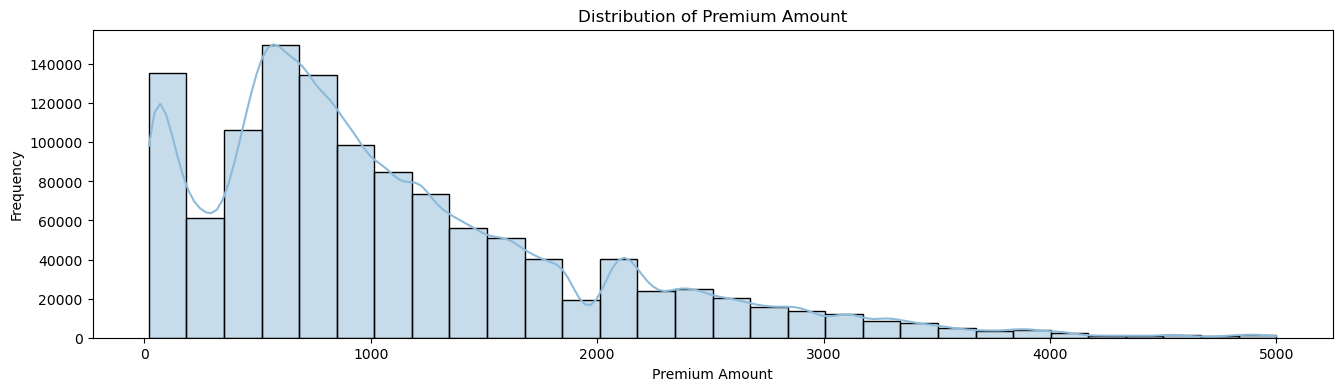

In [32]:
plt.figure(figsize=(16, 4))

# Histogram
sns.histplot(train["Premium Amount"], bins=30, kde=True, color="#8ebad9")
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Premium Amount')
plt.show()

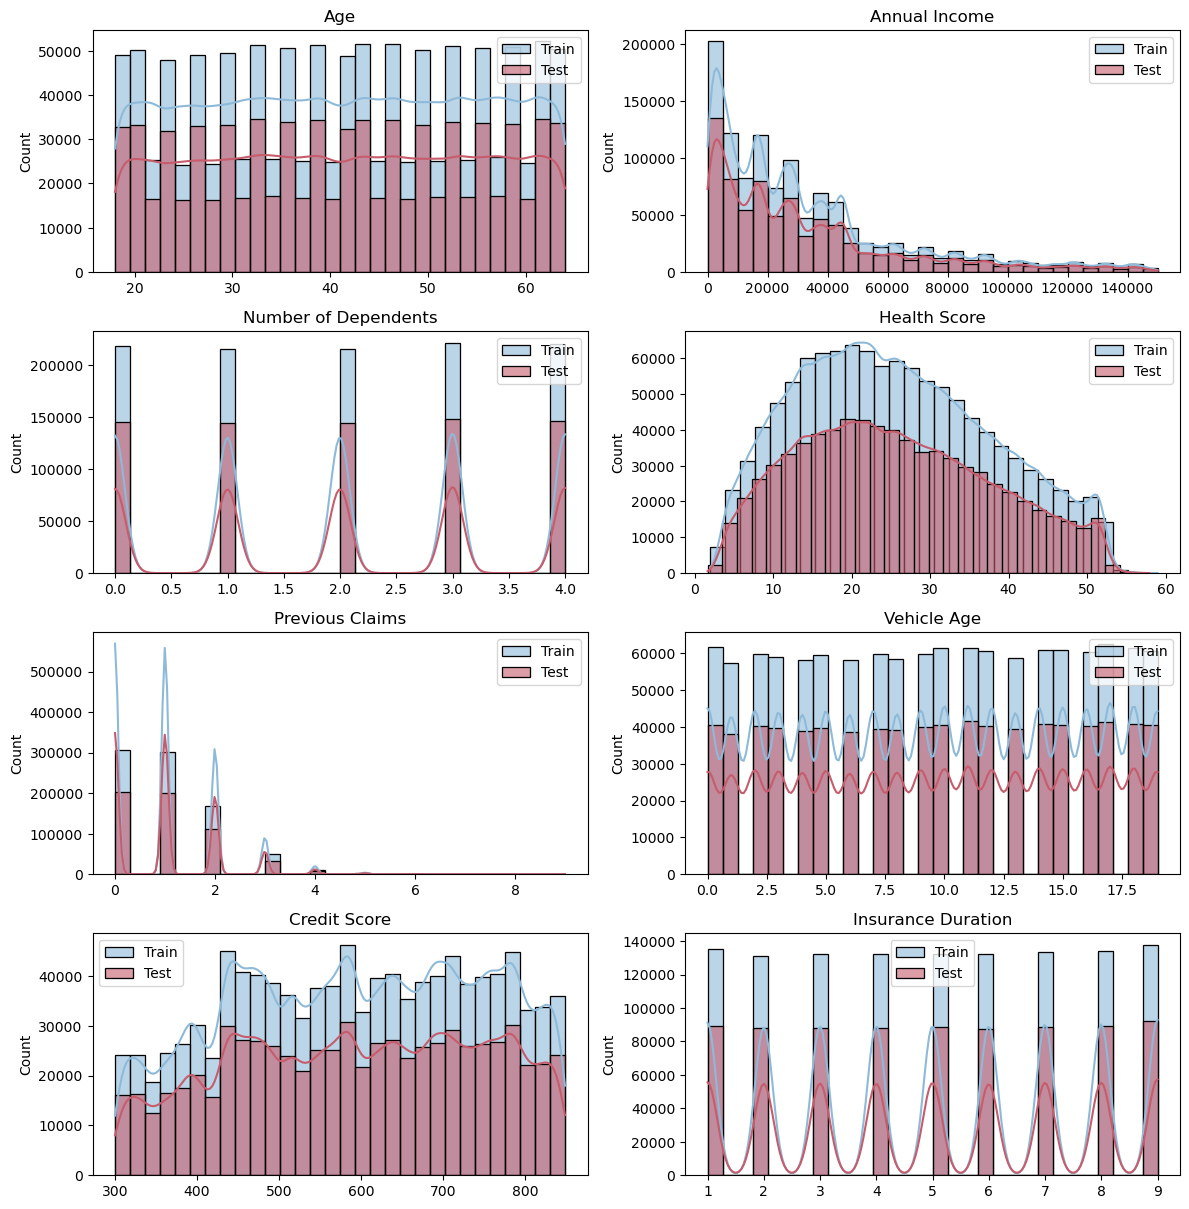

In [79]:
train_cols = train.select_dtypes(include=['number']).columns.tolist()
test_cols = test.select_dtypes(include=['number']).columns.tolist()

# Find common columns between train and test
common_cols = [col for col in train_cols if col in test_cols and col != "id"]

# Set up the figure size
plt.figure(figsize=(12, len(common_cols) * 3))

# Plot histograms for each common numerical column
for i, col in enumerate(common_cols, 1):
    plt.subplot(len(common_cols), 2, i)
    sns.histplot(train[col], bins=30, kde=True, color="#8ebad9", label="Train", alpha=0.6)
    sns.histplot(test[col], bins=30, kde=True, color="#c65c6c", label="Test", alpha=0.6)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

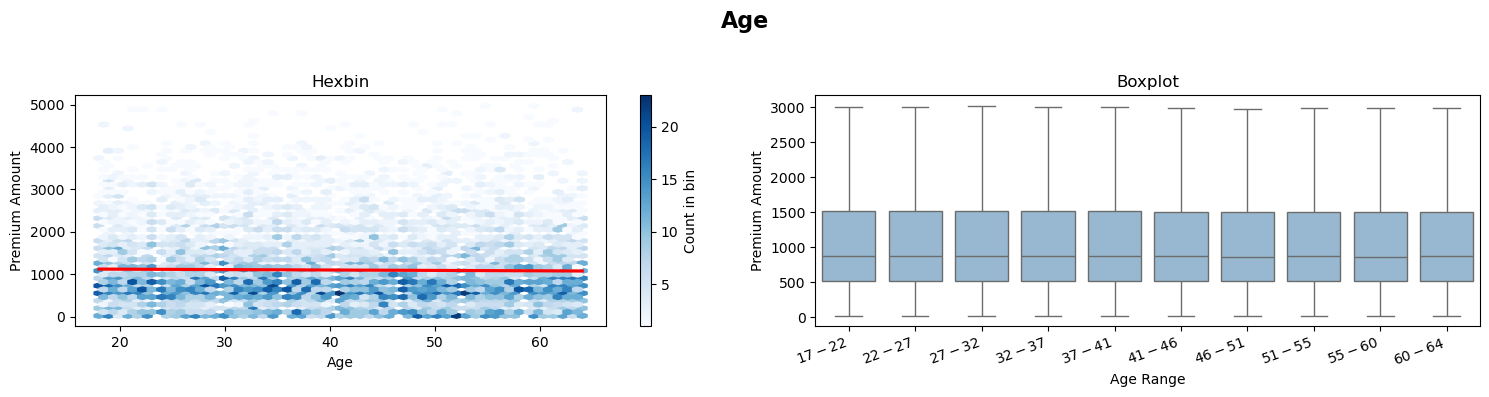

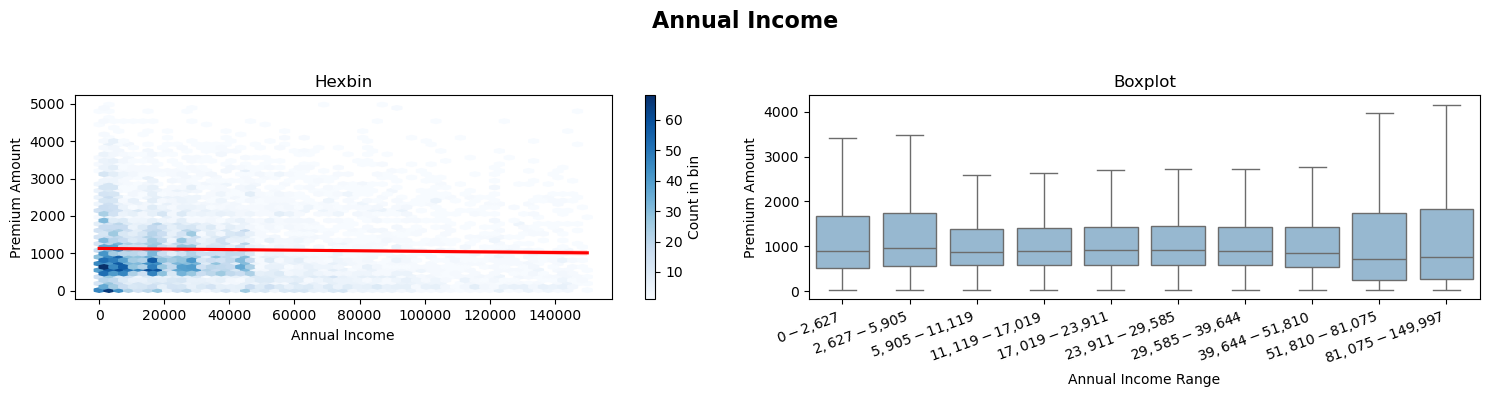

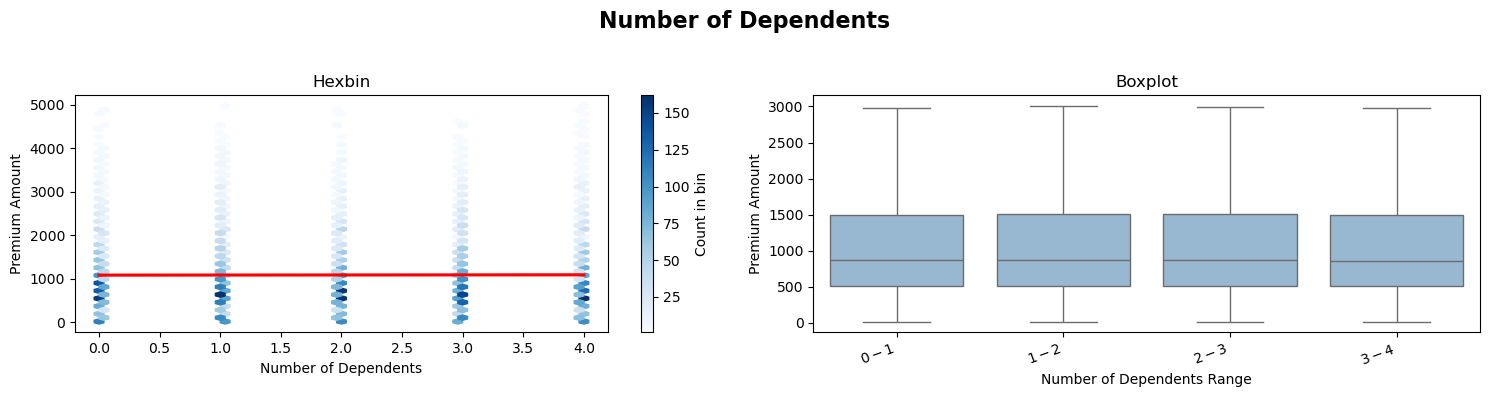

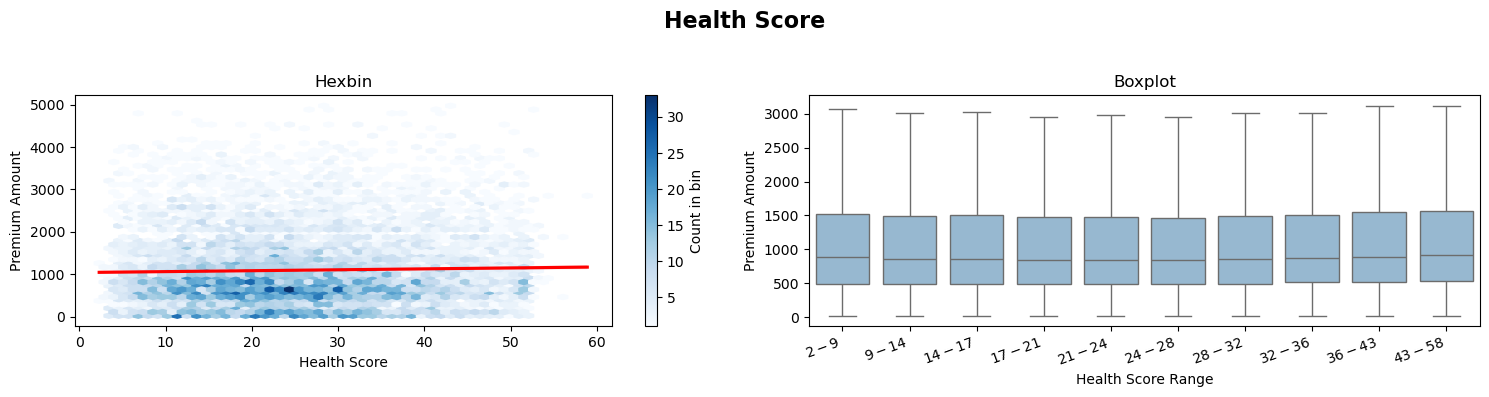

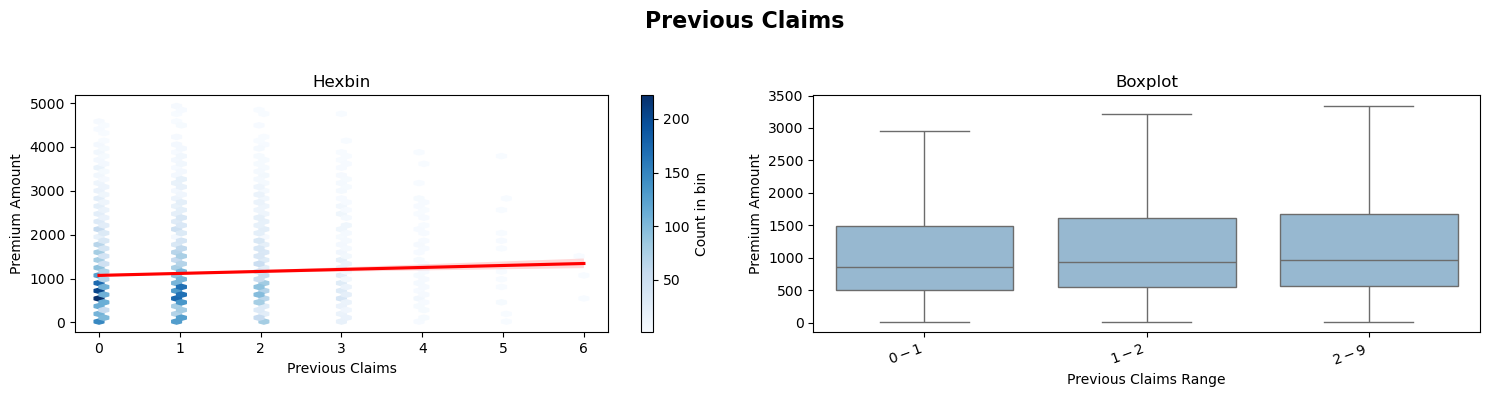

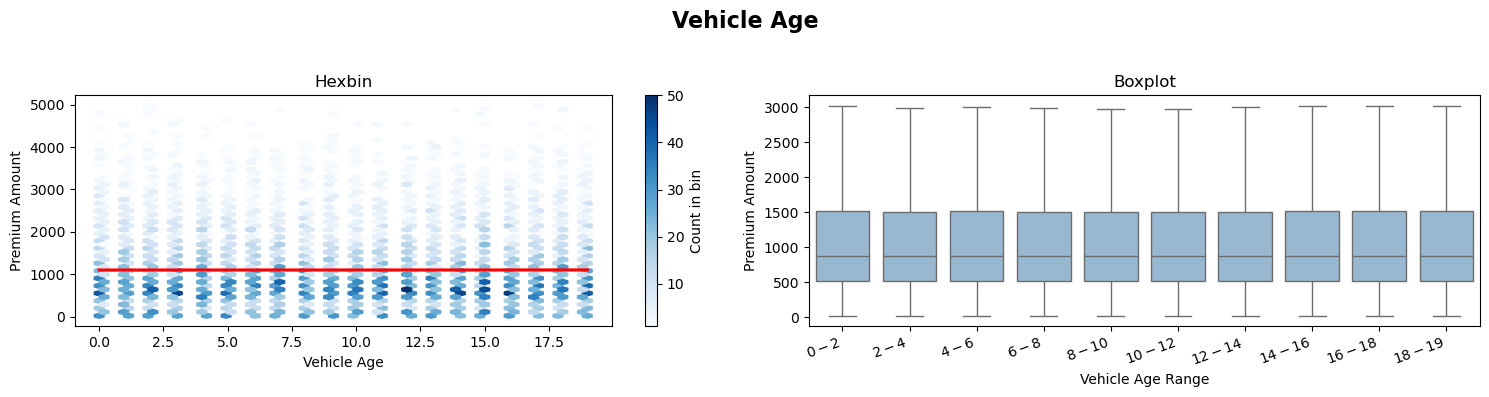

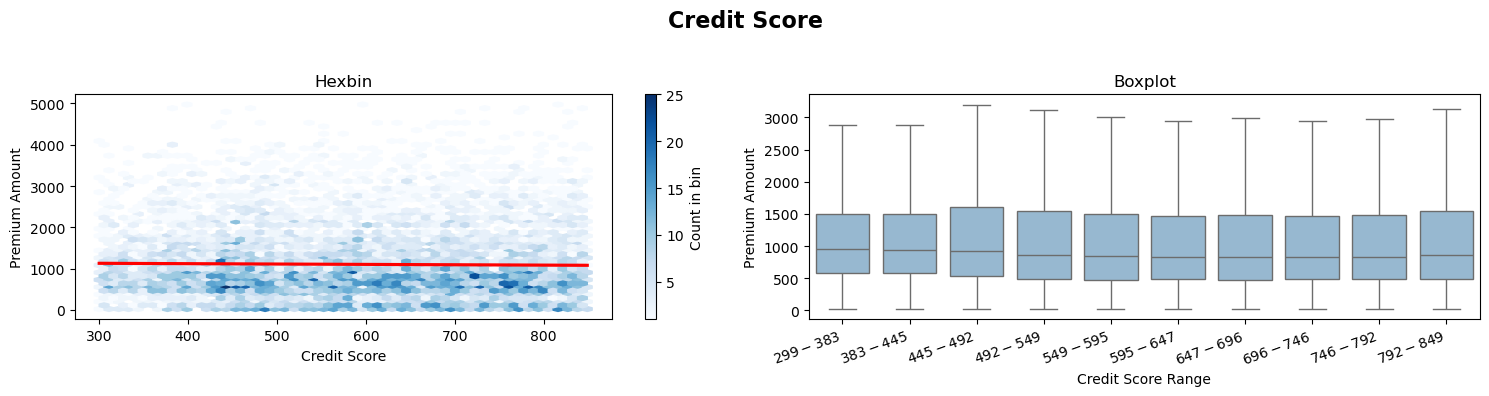

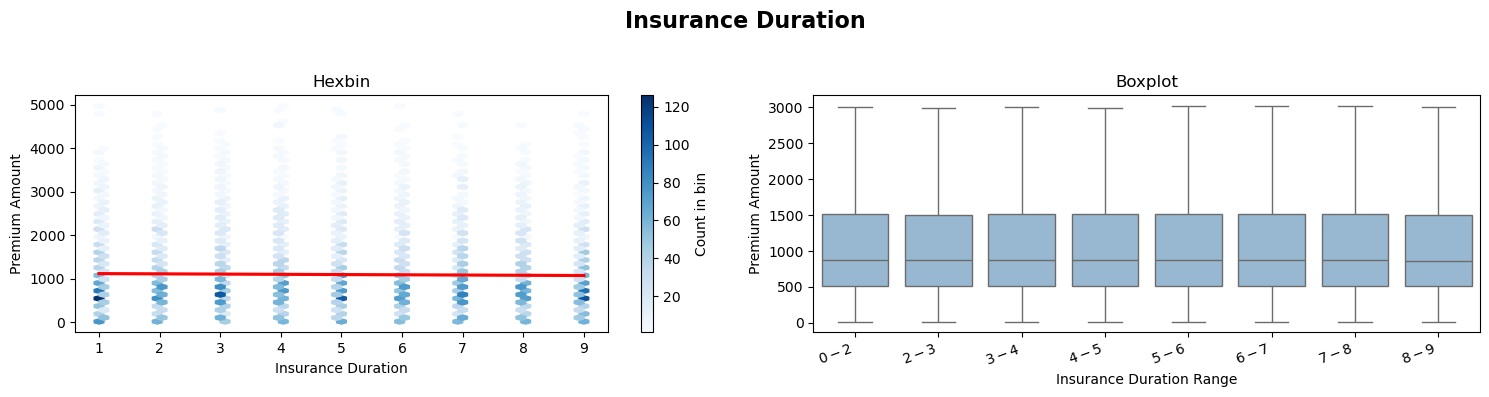

In [40]:
numeric_columns = train.select_dtypes(include=['number']).columns.drop('Premium Amount')

# Loop through each numeric variable
for col in numeric_columns:
    train_short = train.head(10000)  # Subset data for hexbin plot

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Add a super title above both subplots
    fig.suptitle(col, fontsize=16, fontweight="bold")

    ## HEXBIN PLOT
    hb = axes[0].hexbin(train_short[col], train_short['Premium Amount'], gridsize=50, cmap='Blues', mincnt=1)

    # Add a colorbar
    cb = fig.colorbar(hb, ax=axes[0])
    cb.set_label("Count in bin")

    # Overlay regression line
    sns.regplot(data=train_short, x=col, y='Premium Amount', scatter=False, ax=axes[0], color='red')

    # Labels and title
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Premium Amount")
    axes[0].set_title(f"Hexbin")

    ## BOXPLOT
    # Create quantile bins
    quantiles = pd.qcut(train[col], q=10, duplicates="drop")
    bin_labels = [f"${int(bin.left):,} - ${int(bin.right):,}" for bin in quantiles.cat.categories]

    # Assign these labels to a new column
    Binned = quantiles.cat.rename_categories(bin_labels)

    # Boxplot
    sns.boxplot(x=Binned, y=train['Premium Amount'], color="#8ebad9", showfliers=False, ax=axes[1])

    # Rotate x-axis labels
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha="right")

    # Labels and title
    axes[1].set_xlabel(f"{col} Range")
    axes[1].set_ylabel("Premium Amount")
    axes[1].set_title(f"Boxplot")

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle spacing
    plt.show()

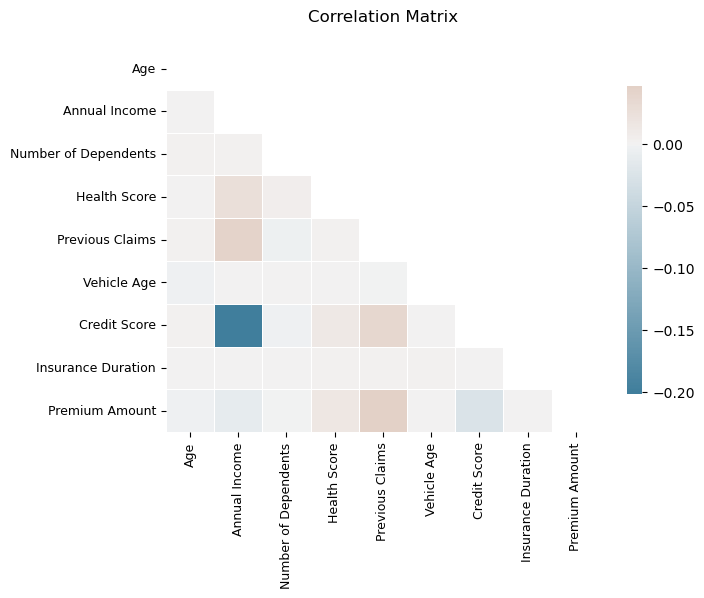

In [18]:
numeric_cols = train.select_dtypes(include=["number"])

plt.style.use("default")
corr_mat = numeric_cols.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.diverging_palette(230, 30, as_cmap=True)
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(
    corr_mat,
    mask=mask,
    cbar=True,
    cmap=cmap,
    center=0,
    square=False,
    annot=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix\n")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

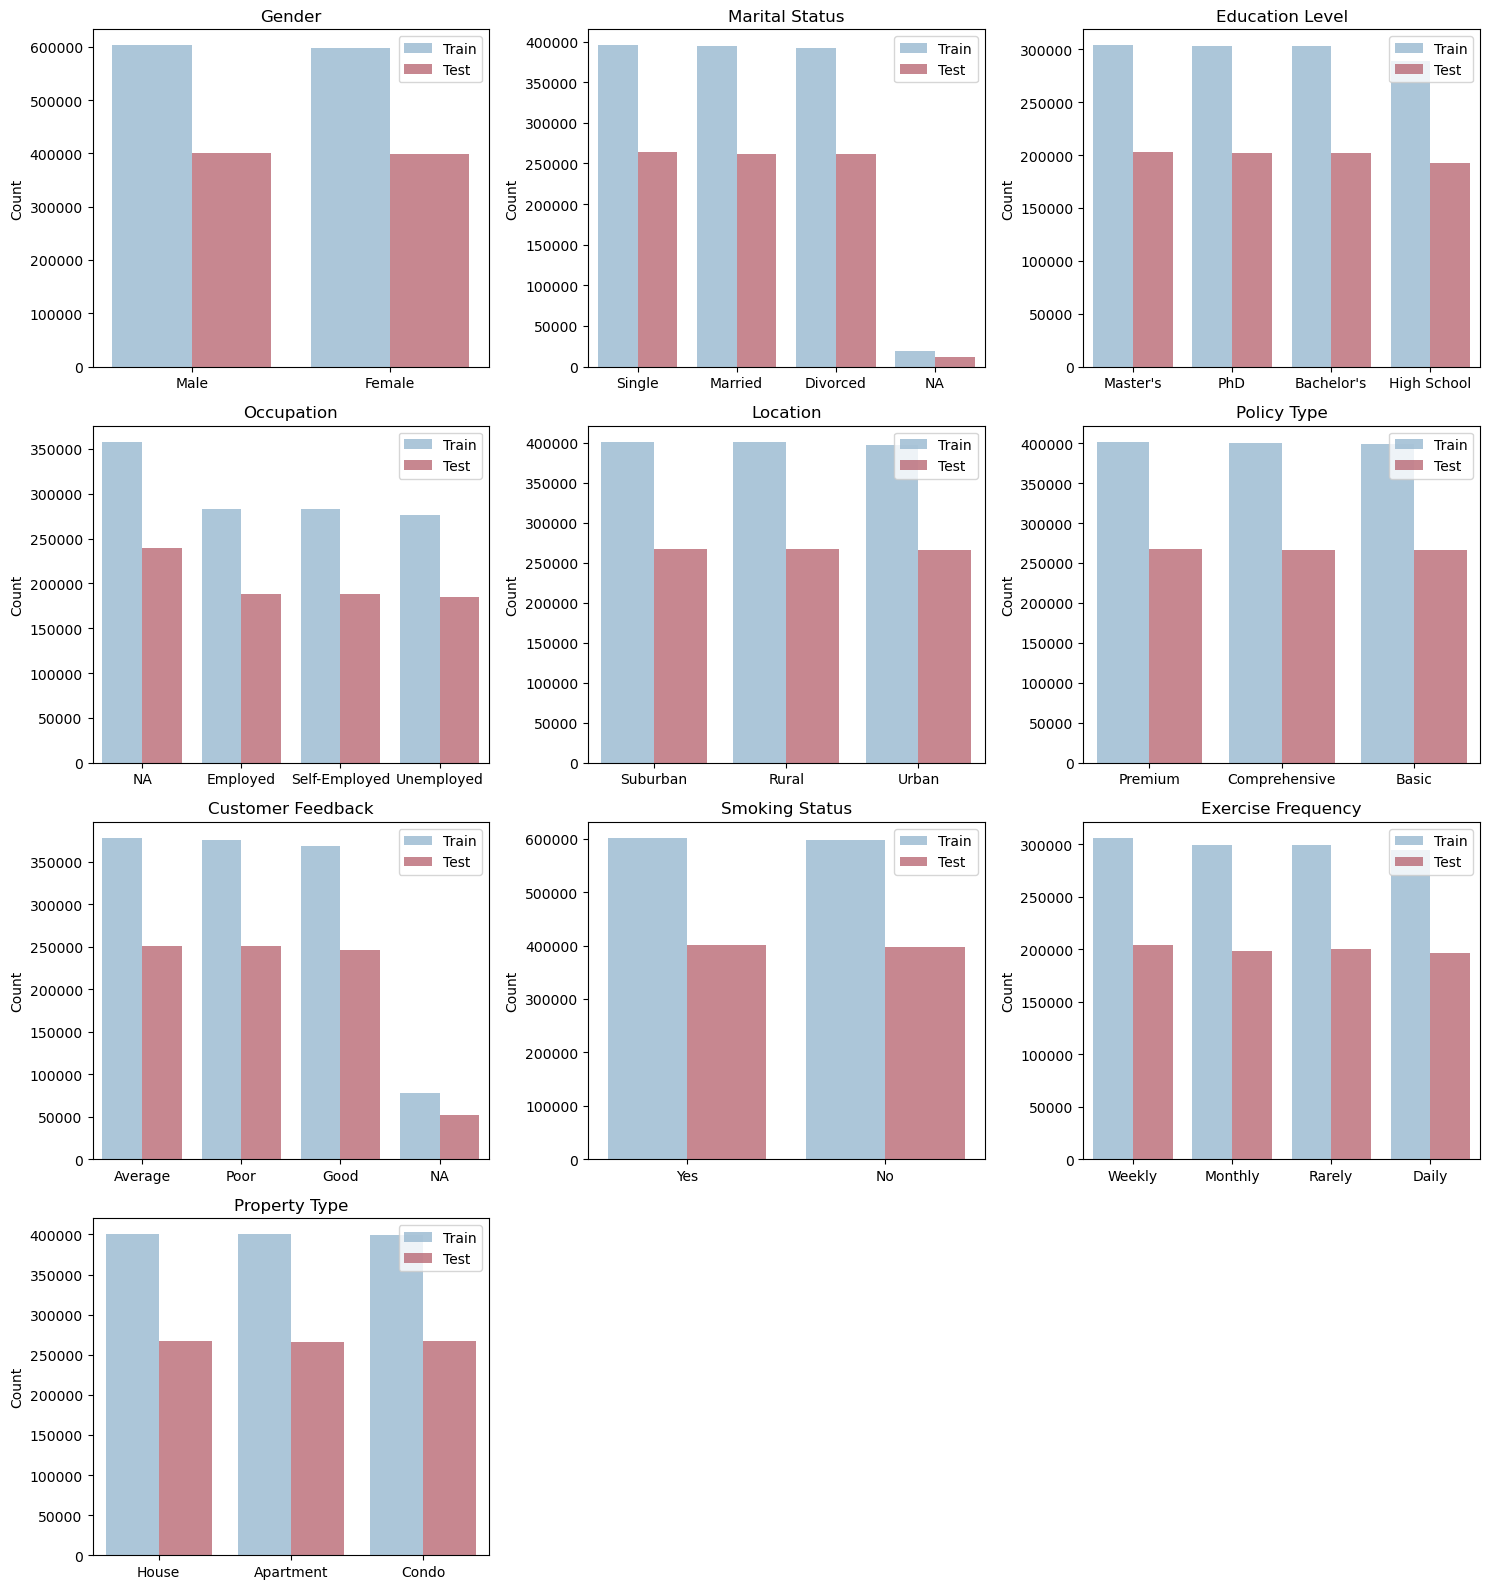

In [34]:
categorical_cols = train.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop(["Policy Start Date"], errors="ignore")

# Find common categorical columns between train and test
common_categorical_cols = [col for col in categorical_cols if col in test.columns]

# Set up figure size (3 columns per row)
n_cols = 3
n_rows = (len(common_categorical_cols) // n_cols) + (len(common_categorical_cols) % n_cols > 0)

plt.figure(figsize=(15, n_rows * 4))  # Increase figure height for better readability

# Loop through common categorical columns and create bar plots
for i, col in enumerate(common_categorical_cols, 1):
    # Fill missing values with "NA"
    train_filled = train.fillna("NA")
    test_filled = test.fillna("NA")

    # Get the top 12 value counts for both train and test
    top_12_train = train_filled[col].value_counts().head(12)
    top_12_test = test_filled[col].value_counts().head(12)

    # Create a DataFrame for Seaborn (long format)
    df_train = pd.DataFrame({"Category": top_12_train.index, "Count": top_12_train.values, "Dataset": "Train"})
    df_test = pd.DataFrame({"Category": top_12_test.index, "Count": top_12_test.values, "Dataset": "Test"})

    df_combined = pd.concat([df_train, df_test])  # Combine train & test data

    # Create subplot
    plt.subplot(n_rows, n_cols, i)
    
    # Side-by-side bar plot using hue="Dataset"
    sns.barplot(x="Category", y="Count", hue="Dataset", data=df_combined, alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})

    # Formatting
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

* Look at the relationship between each categorical variable and the Premium Amount
    * I will look at this visually and see if any have a statistically significant difference. I will use the Kruskal-Wallis Test because Premium Amount is not normally distributed and contains outliers.

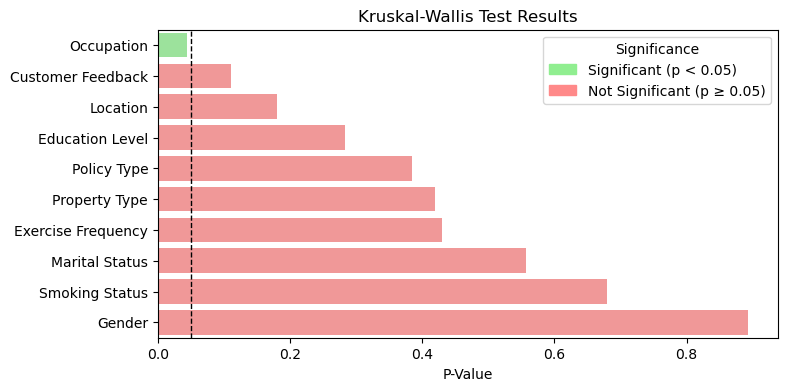

In [23]:
from matplotlib.patches import Patch

# Select categorical columns, excluding "Policy Start Date"
categorical_cols = train.select_dtypes(include=["object"]).columns.drop(["Policy Start Date"], errors="ignore")

# Store results
kruskal_results = {}

# Loop through each categorical column
for cat_col in categorical_cols:
    # Drop missing values for testing
    data = train[[cat_col, "Premium Amount"]].dropna()

    # Get unique categories
    unique_categories = data[cat_col].unique()

    # Ensure there are at least 2 categories for comparison
    if len(unique_categories) > 1:
        # Create groups for the Kruskal-Wallis test
        groups = [data["Premium Amount"][data[cat_col] == cat] for cat in unique_categories]

        # Perform Kruskal-Wallis test (Non-parametric)
        h_stat, p_value = stats.kruskal(*groups)

        # Store results
        kruskal_results[cat_col] = p_value

# Convert results to DataFrame for better visualization
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index', columns=['p_value'])
kruskal_df["Significant"] = kruskal_df["p_value"] < 0.05  # Mark significant differences

# Sort by p-value (ascending order)
kruskal_df = kruskal_df.sort_values(by="p_value", ascending=True).round(4)

# Define colors (lighter green for significant, red for non-significant)
colors = ["#90EE90" if sig else "#ff8989" for sig in kruskal_df["Significant"]]

# Visualization: Horizontal Barplot of p-values with color coding
plt.figure(figsize=(8, 4))
bars = sns.barplot(y=kruskal_df.index, x=kruskal_df["p_value"], palette=colors, orient='h')

# Add legend manually
legend_patches = [
    Patch(color="#90EE90", label="Significant (p < 0.05)"),
    Patch(color="#ff8989", label="Not Significant (p ≥ 0.05)")
]
plt.legend(handles=legend_patches, loc="upper right", title="Significance")

# Formatting
plt.axvline(x=0.05, color='black', linestyle='dashed', linewidth=1)  # Significance threshold line
plt.ylabel("")
plt.xlabel("P-Value")
plt.title("Kruskal-Wallis Test Results")
plt.show()

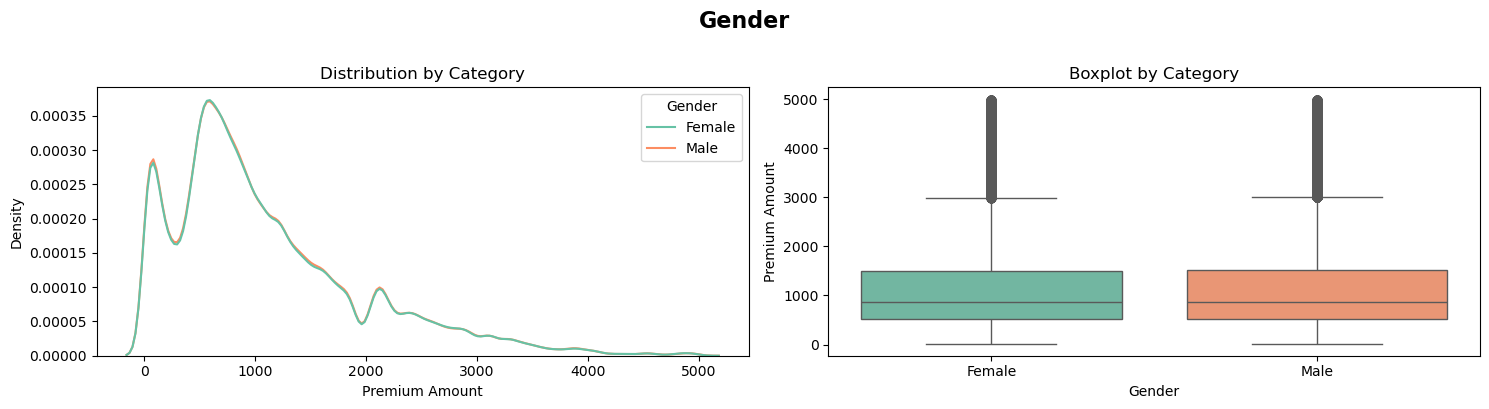

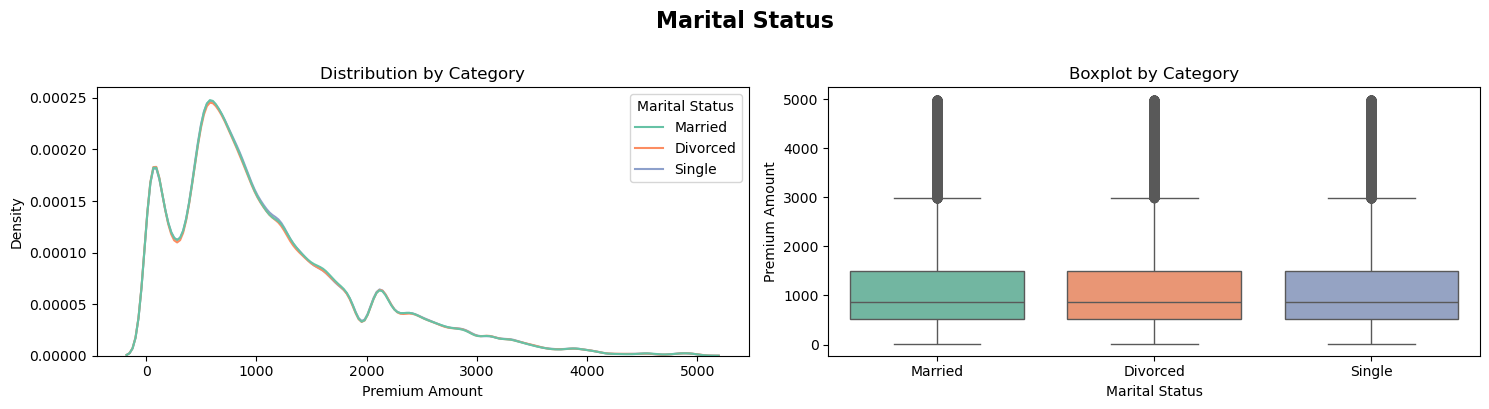

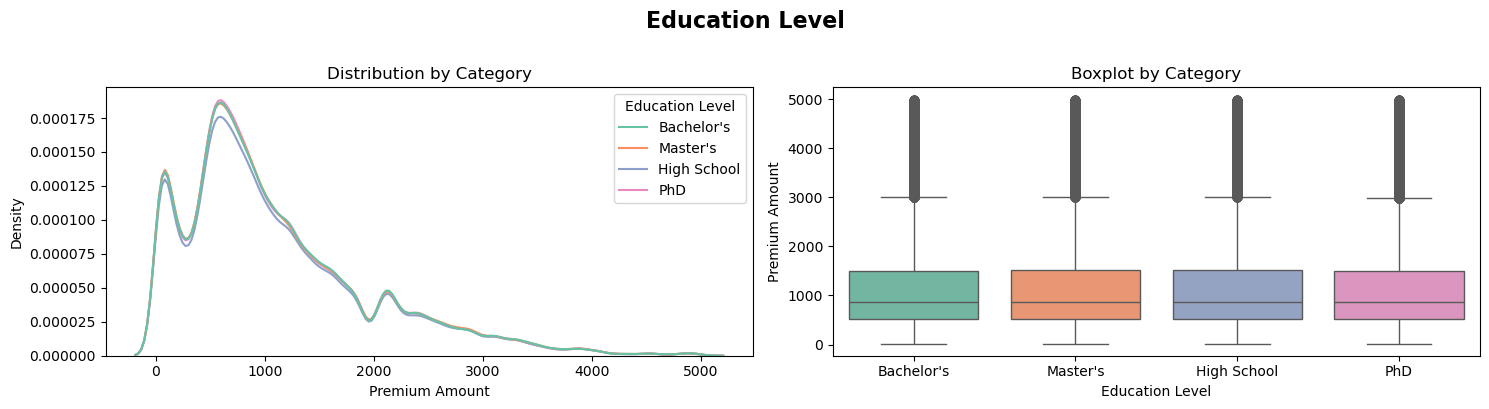

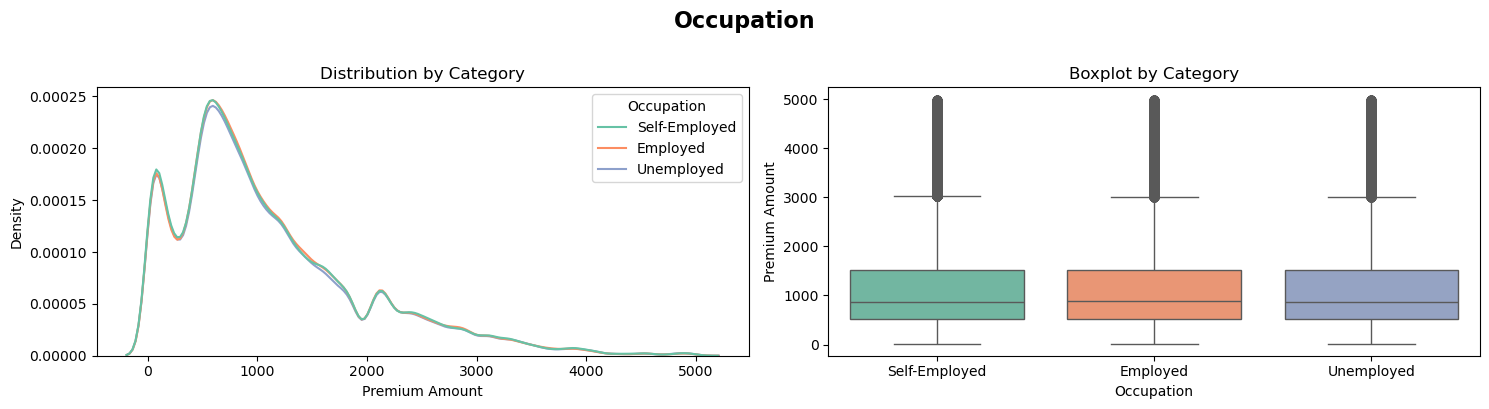

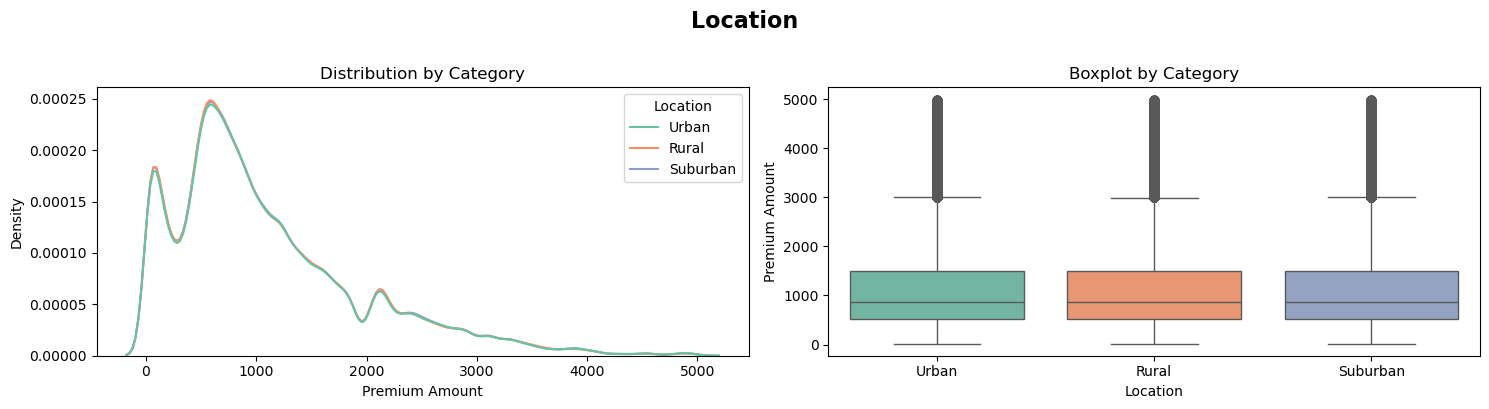

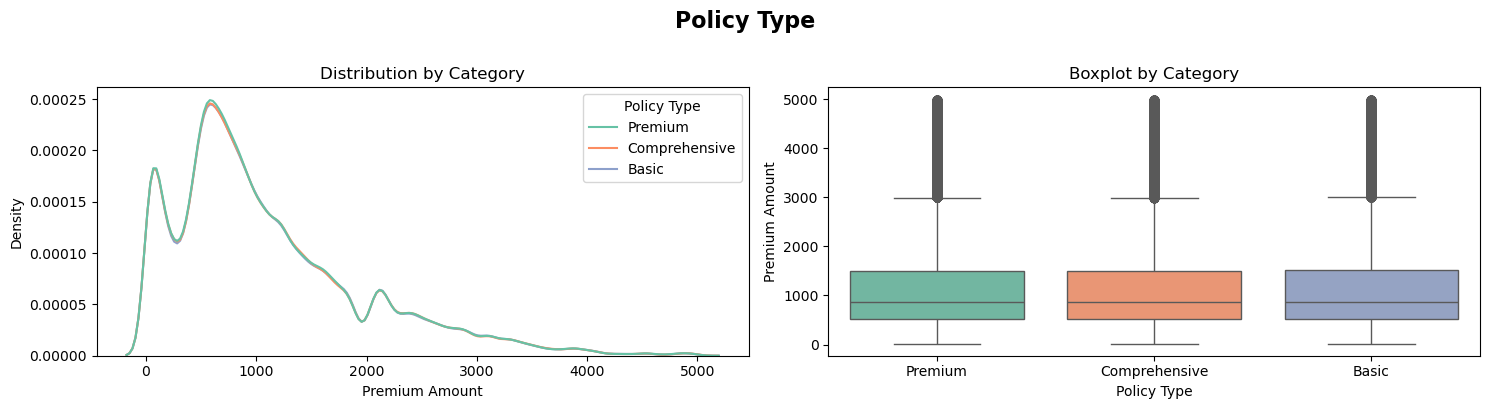

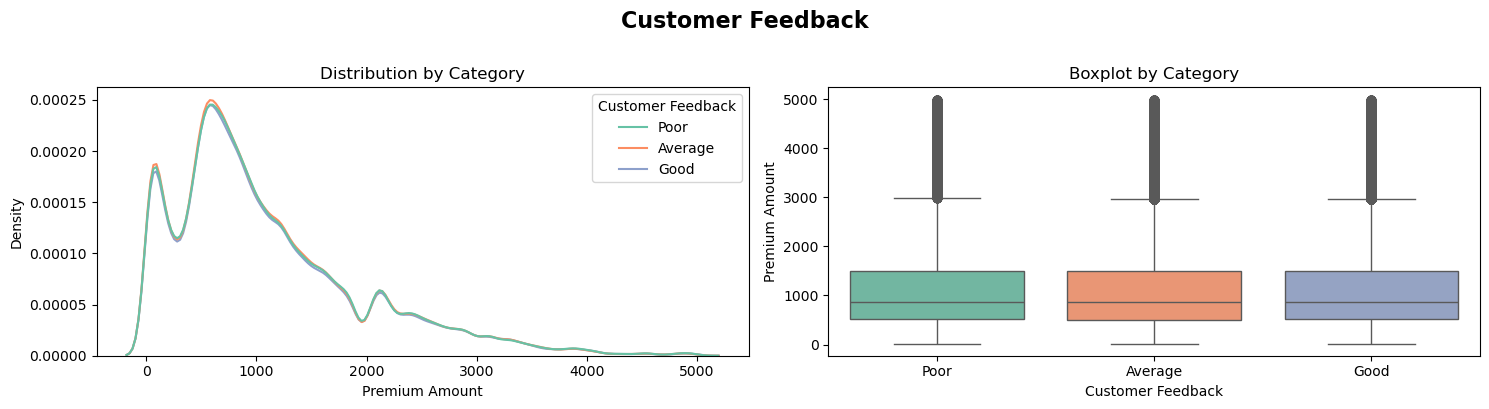

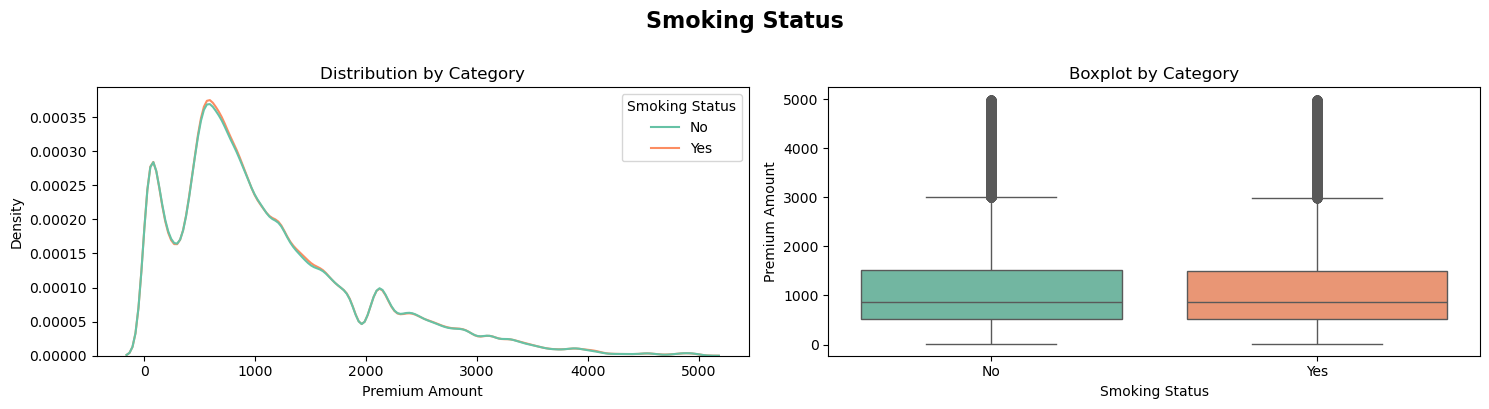

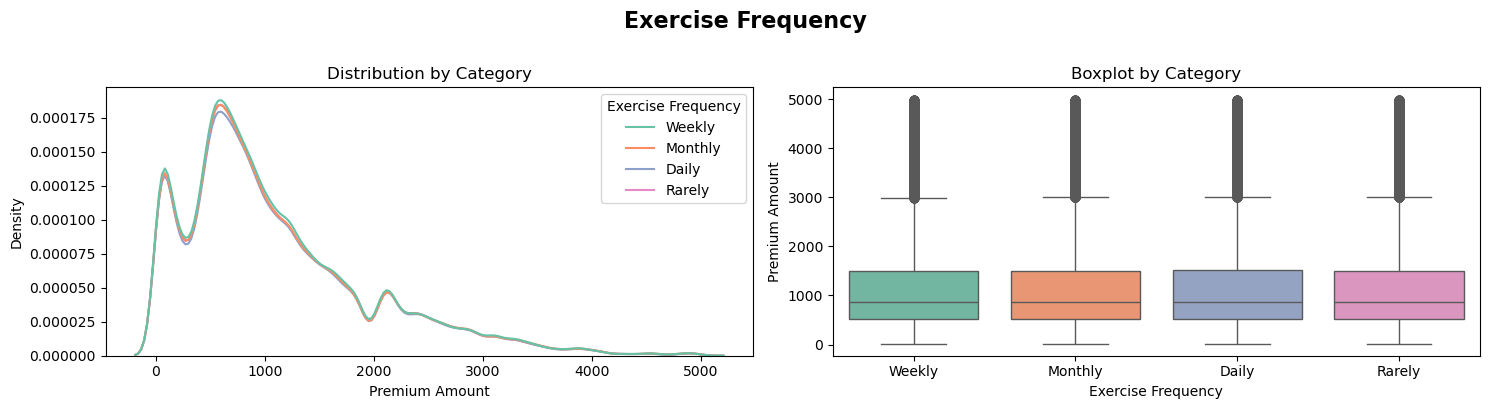

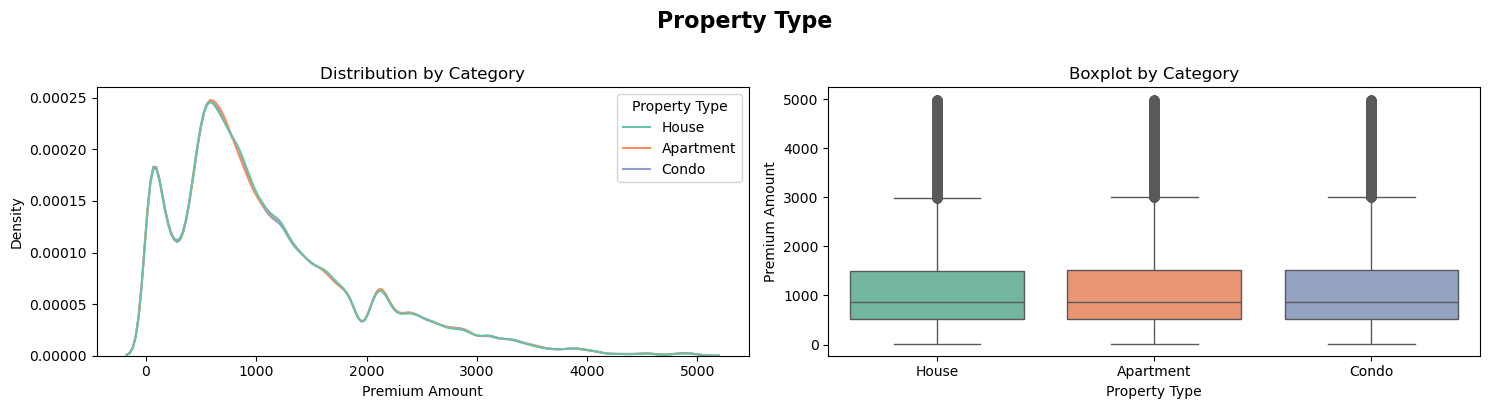

In [25]:
categorical_cols = train.select_dtypes(include=["object"]).columns.drop(["Policy Start Date"], errors="ignore")

# Number of columns per row (3 plots per category)
n_cols = 2

# Loop through each categorical column and create plots
for idx, cat_col in enumerate(categorical_cols):
    
    fig, ax = plt.subplots(1, n_cols, figsize=(15, 4))  # Create subplots

    # Set a main title for all 3 plots in the middle
    fig.suptitle(f"{cat_col}", fontsize=16, fontweight='bold', y=1.01)  # Title above plots

    # Compute mean Premium Amount for the current categorical column
    mean_premium_amount = train.groupby(cat_col)['Premium Amount'].mean().reset_index()

    # KDE plot (density plot of Premium Amount by category)
    sns.kdeplot(data=train, x='Premium Amount', hue=cat_col, ax=ax[0], palette="Set2")
    
    # Bar plot (mean Premium Amount by category)
    sns.boxplot(data=train, x=cat_col, y='Premium Amount', ax=ax[1], palette="Set2")
    
    # Set plot titles
    ax[0].set_title(f'Distribution by Category')
    ax[1].set_title(f'Boxplot by Category')

    plt.tight_layout()
    plt.show()

Missing Values

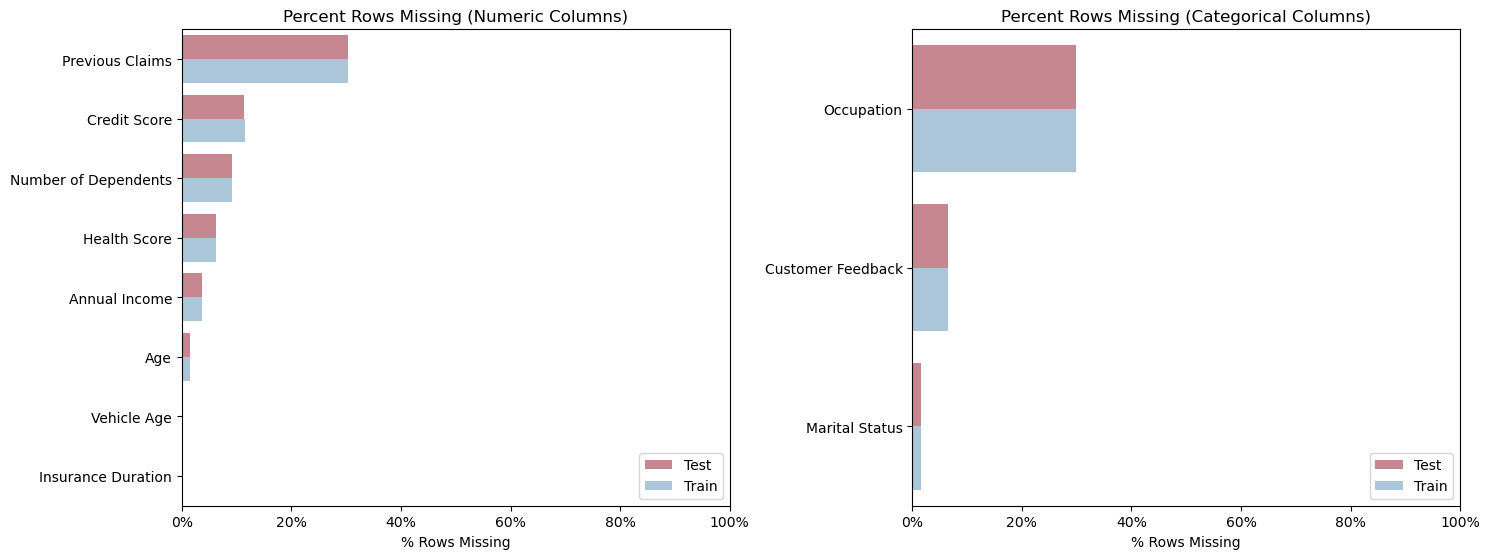

In [97]:
import matplotlib.ticker as mtick

def missing_percentage(df, dataset_name):
    return df.isna().mean().to_frame(name=dataset_name) * 100

# Get missing values for train and test datasets
missing_train = missing_percentage(train, 'Train')
missing_test = missing_percentage(test, 'Test')

# Combine results for numeric columns
result = pd.concat([missing_train, missing_test], axis=1)

# Add column for data type of each
result["Data Type"] = train.dtypes

# Filter only numeric columns (float64)
result_num = result[result["Data Type"] == "float64"].drop(columns="Data Type")

# Reshape result_num to long format
result_num = result_num.reset_index().melt(id_vars="index", var_name="Dataset", value_name="Missing_Percent")

# Rename columns for clarity
result_num = result_num.rename(columns={"index": "Column"})

# Only keep columns that have missing data in either train or test
result_num = result_num[result_num["Missing_Percent"] > 0]

# Sort by Missing_Percent in descending order
result_num = result_num.sort_values(by="Missing_Percent", ascending=False)

# Filter only categorical columns (Object type)
result_cat = result[result["Data Type"] == "object"].drop(columns="Data Type")

# Reshape result_cat to long format
result_cat = result_cat.reset_index().melt(id_vars="index", var_name="Dataset", value_name="Missing_Percent")

# Rename columns for clarity
result_cat = result_cat.rename(columns={"index": "Column"})

# Only keep columns that have missing data in either train or test
result_cat = result_cat[result_cat["Missing_Percent"] > 0]

# Sort by Missing_Percent in descending order
result_cat = result_cat.sort_values(by="Missing_Percent", ascending=False)

# Create figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for numeric columns
sns.barplot(y="Column", x="Missing_Percent", hue="Dataset", data=result_num, ax=axes[0], alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})
axes[0].set_xlabel("% Rows Missing")
axes[0].set_ylabel("")
axes[0].set_title("Percent Rows Missing (Numeric Columns)")
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[0].set_xlim(0, 100)
axes[0].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Plot for categorical columns
sns.barplot(y="Column", x="Missing_Percent", hue="Dataset", data=result_cat, ax=axes[1], alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})
axes[1].set_xlabel("% Rows Missing")
axes[1].set_ylabel("")
axes[1].set_title("Percent Rows Missing (Categorical Columns)")
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[1].set_xlim(0, 100)
axes[1].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

Handle Missing Data

In [3]:
# Occupation
train["Occupation"] = train["Occupation"].fillna("Missing")
test["Occupation"] = test["Occupation"].fillna("Missing")

# Customer Feedback
train["Customer Feedback"] = train["Customer Feedback"].fillna("Missing")
test["Customer Feedback"] = test["Customer Feedback"].fillna("Missing")

# Marital Status
train["Marital Status"] = train["Marital Status"].fillna("Missing")
test["Marital Status"] = test["Marital Status"].fillna("Missing")

#Previous Claims
mode_prev_claims = train["Previous Claims"].mode()[0]
train["Previous Claims"] = train["Previous Claims"].fillna(mode_prev_claims)
test["Previous Claims"] = test["Previous Claims"].fillna(mode_prev_claims)

#Credit Score
mean_credit_score = train["Credit Score"].mean()
train["Credit Score"] = train["Credit Score"].fillna(mean_credit_score)
test["Credit Score"] = test["Credit Score"].fillna(mean_credit_score)

#Number of Dependents
mode_num_dependents = train["Number of Dependents"].mode()[0]
train["Number of Dependents"] = train["Number of Dependents"].fillna(mode_num_dependents)
test["Number of Dependents"] = test["Number of Dependents"].fillna(mode_num_dependents)

#Health Score
mean_health_score = train["Health Score"].mean()
train["Health Score"] = train["Health Score"].fillna(mean_health_score)
test["Health Score"] = test["Health Score"].fillna(mean_health_score)

#Annual Income
mean_annual_income = train["Annual Income"].mean()
train["Annual Income"] = train["Annual Income"].fillna(mean_annual_income)
test["Annual Income"] = test["Annual Income"].fillna(mean_annual_income)

#Age
mean_age = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean_age)
test["Age"] = test["Age"].fillna(mean_age)

#Vehicle Age
mean_vehicle_age = train["Vehicle Age"].mean()
train["Vehicle Age"] = train["Vehicle Age"].fillna(mean_vehicle_age)
test["Vehicle Age"] = test["Vehicle Age"].fillna(mean_vehicle_age)

#Insurance Duration	
mode_insurance_duration = train["Insurance Duration"].mode()[0]
train["Insurance Duration"] = train["Insurance Duration"].fillna(mode_insurance_duration)
test["Insurance Duration"] = test["Insurance Duration"].fillna(mode_insurance_duration)


Outliers

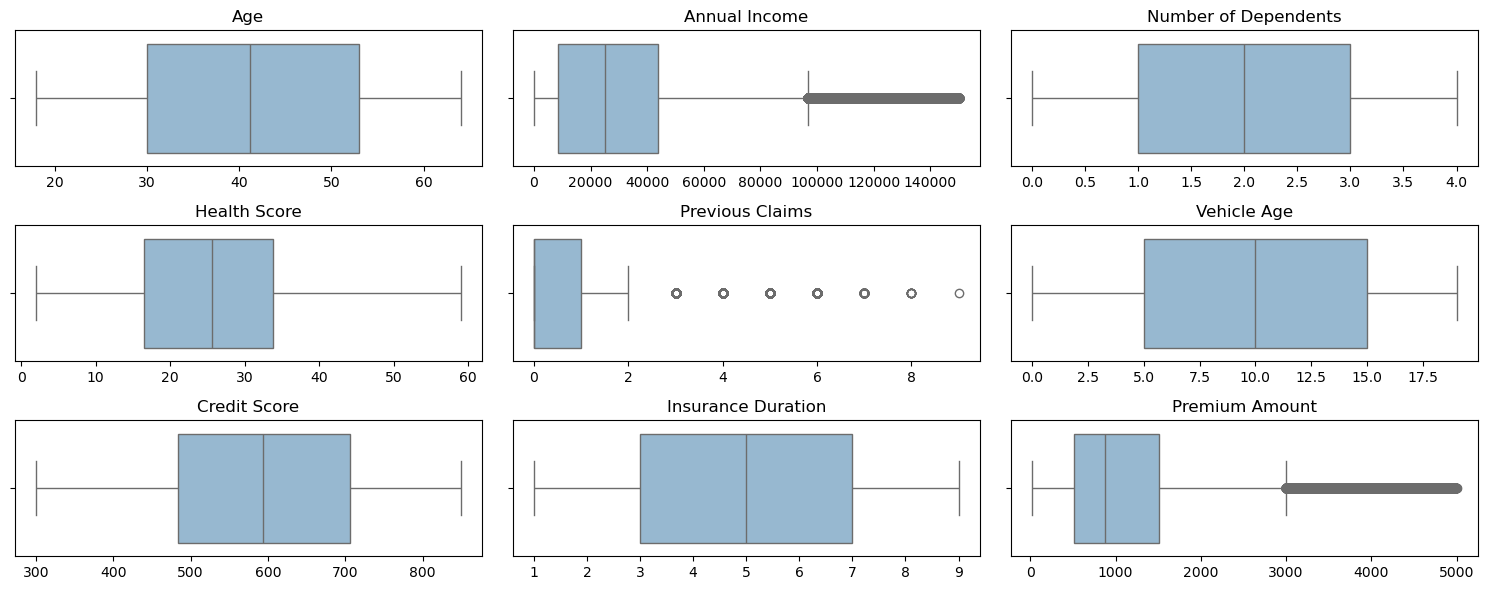

In [49]:
# Select numerical columns
num_cols = train.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col != "id"]  # Exclude "id" if needed

# Set up the figure size (3 columns per row)
n_cols = 3
n_rows = (len(num_cols) // n_cols) + (len(num_cols) % n_cols > 0)  # Calculate number of rows

# Set up the figure size
plt.figure(figsize=(15, n_rows * 2))

# Loop through numerical columns and create boxplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=train[col], color="#8ebad9")
    plt.title(f"{col}")
    plt.xlabel("")
    
# Adjust layout
plt.tight_layout()
plt.show()

* We will remove outliers from Annual Income, Previous Claims, and Premium Amount as they may affect the model

In [4]:
Q1 = train["Annual Income"].quantile(0.25)
Q3 = train["Annual Income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers1 = train[(train["Annual Income"] >= lower_bound) & (train["Annual Income"] <= upper_bound)]

Q1 = train["Previous Claims"].quantile(0.25)
Q3 = train["Previous Claims"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers2 = train[(train["Previous Claims"] >= lower_bound) & (train["Previous Claims"] <= upper_bound)]

Q1 = train["Premium Amount"].quantile(0.25)
Q3 = train["Premium Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers3 = train[(train["Premium Amount"] >= lower_bound) & (train["Premium Amount"] <= upper_bound)]

train = train[train.index.isin(outliers1.index) & 
               train.index.isin(outliers2.index) & 
               train.index.isin(outliers3.index)]


Duplicates

In [73]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


Incorrect Data Types

In [5]:
train['Policy Start Date'] = pd.to_datetime( train["Policy Start Date"] )
train["Year"] = train["Policy Start Date"].dt.year
train["Month"] = train["Policy Start Date"].dt.month
train["Day"] = train["Policy Start Date"].dt.day
train = train.drop(columns={"Policy Start Date"})

test['Policy Start Date'] = pd.to_datetime(test["Policy Start Date"])
test["Year"] = test["Policy Start Date"].dt.year
test["Month"] = test["Policy Start Date"].dt.month
test["Day"] = test["Policy Start Date"].dt.day
test = test.drop(columns={"Policy Start Date"})

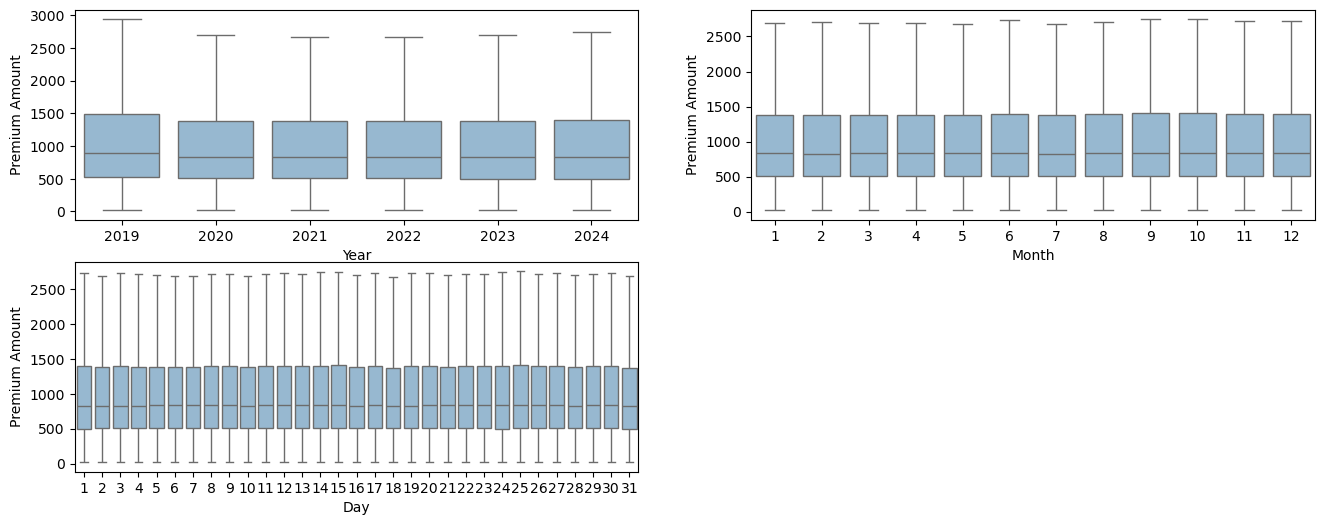

In [97]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(16, 6))

sns.boxplot(x=train["Year"], y=train["Premium Amount"], ax=axes[0,0], showfliers=False, color="#8ebad9")
sns.boxplot(x=train["Month"], y=train["Premium Amount"], ax=axes[0,1], showfliers=False, color="#8ebad9")
sns.boxplot(x=train["Day"], y=train["Premium Amount"], ax=axes[1,0], showfliers=False, color="#8ebad9")
fig.delaxes(axes[1, 1])

## 3. Feature Engineering and Selection

* Create New Features

In [6]:
train['Annual Income by Age'] = train['Annual Income'] / train["Age"]
train['Claims per Year'] = train['Previous Claims'] / train['Insurance Duration']
train['Vehicle Age by Age'] = train['Vehicle Age'] / train['Age']
train['Score Max'] = train['Health Score'] * train['Credit Score']
train['Health Score by Age'] = train['Health Score'] * train['Age']
train['Annual Income by Credit Score'] = train['Annual Income'] * train['Credit Score']

test['Annual Income by Age'] = test['Annual Income'] / test["Age"]
test['Claims per Year'] = test['Previous Claims'] / test['Insurance Duration']
test['Vehicle Age by Age'] = test['Vehicle Age'] / test['Age']
test['Score Max'] = test['Health Score'] * test['Credit Score']
test['Health Score by Age'] = test['Health Score'] * test['Age']
test['Annual Income by Credit Score'] = test['Annual Income'] * test['Credit Score']


* Normalization of Numeric Columns

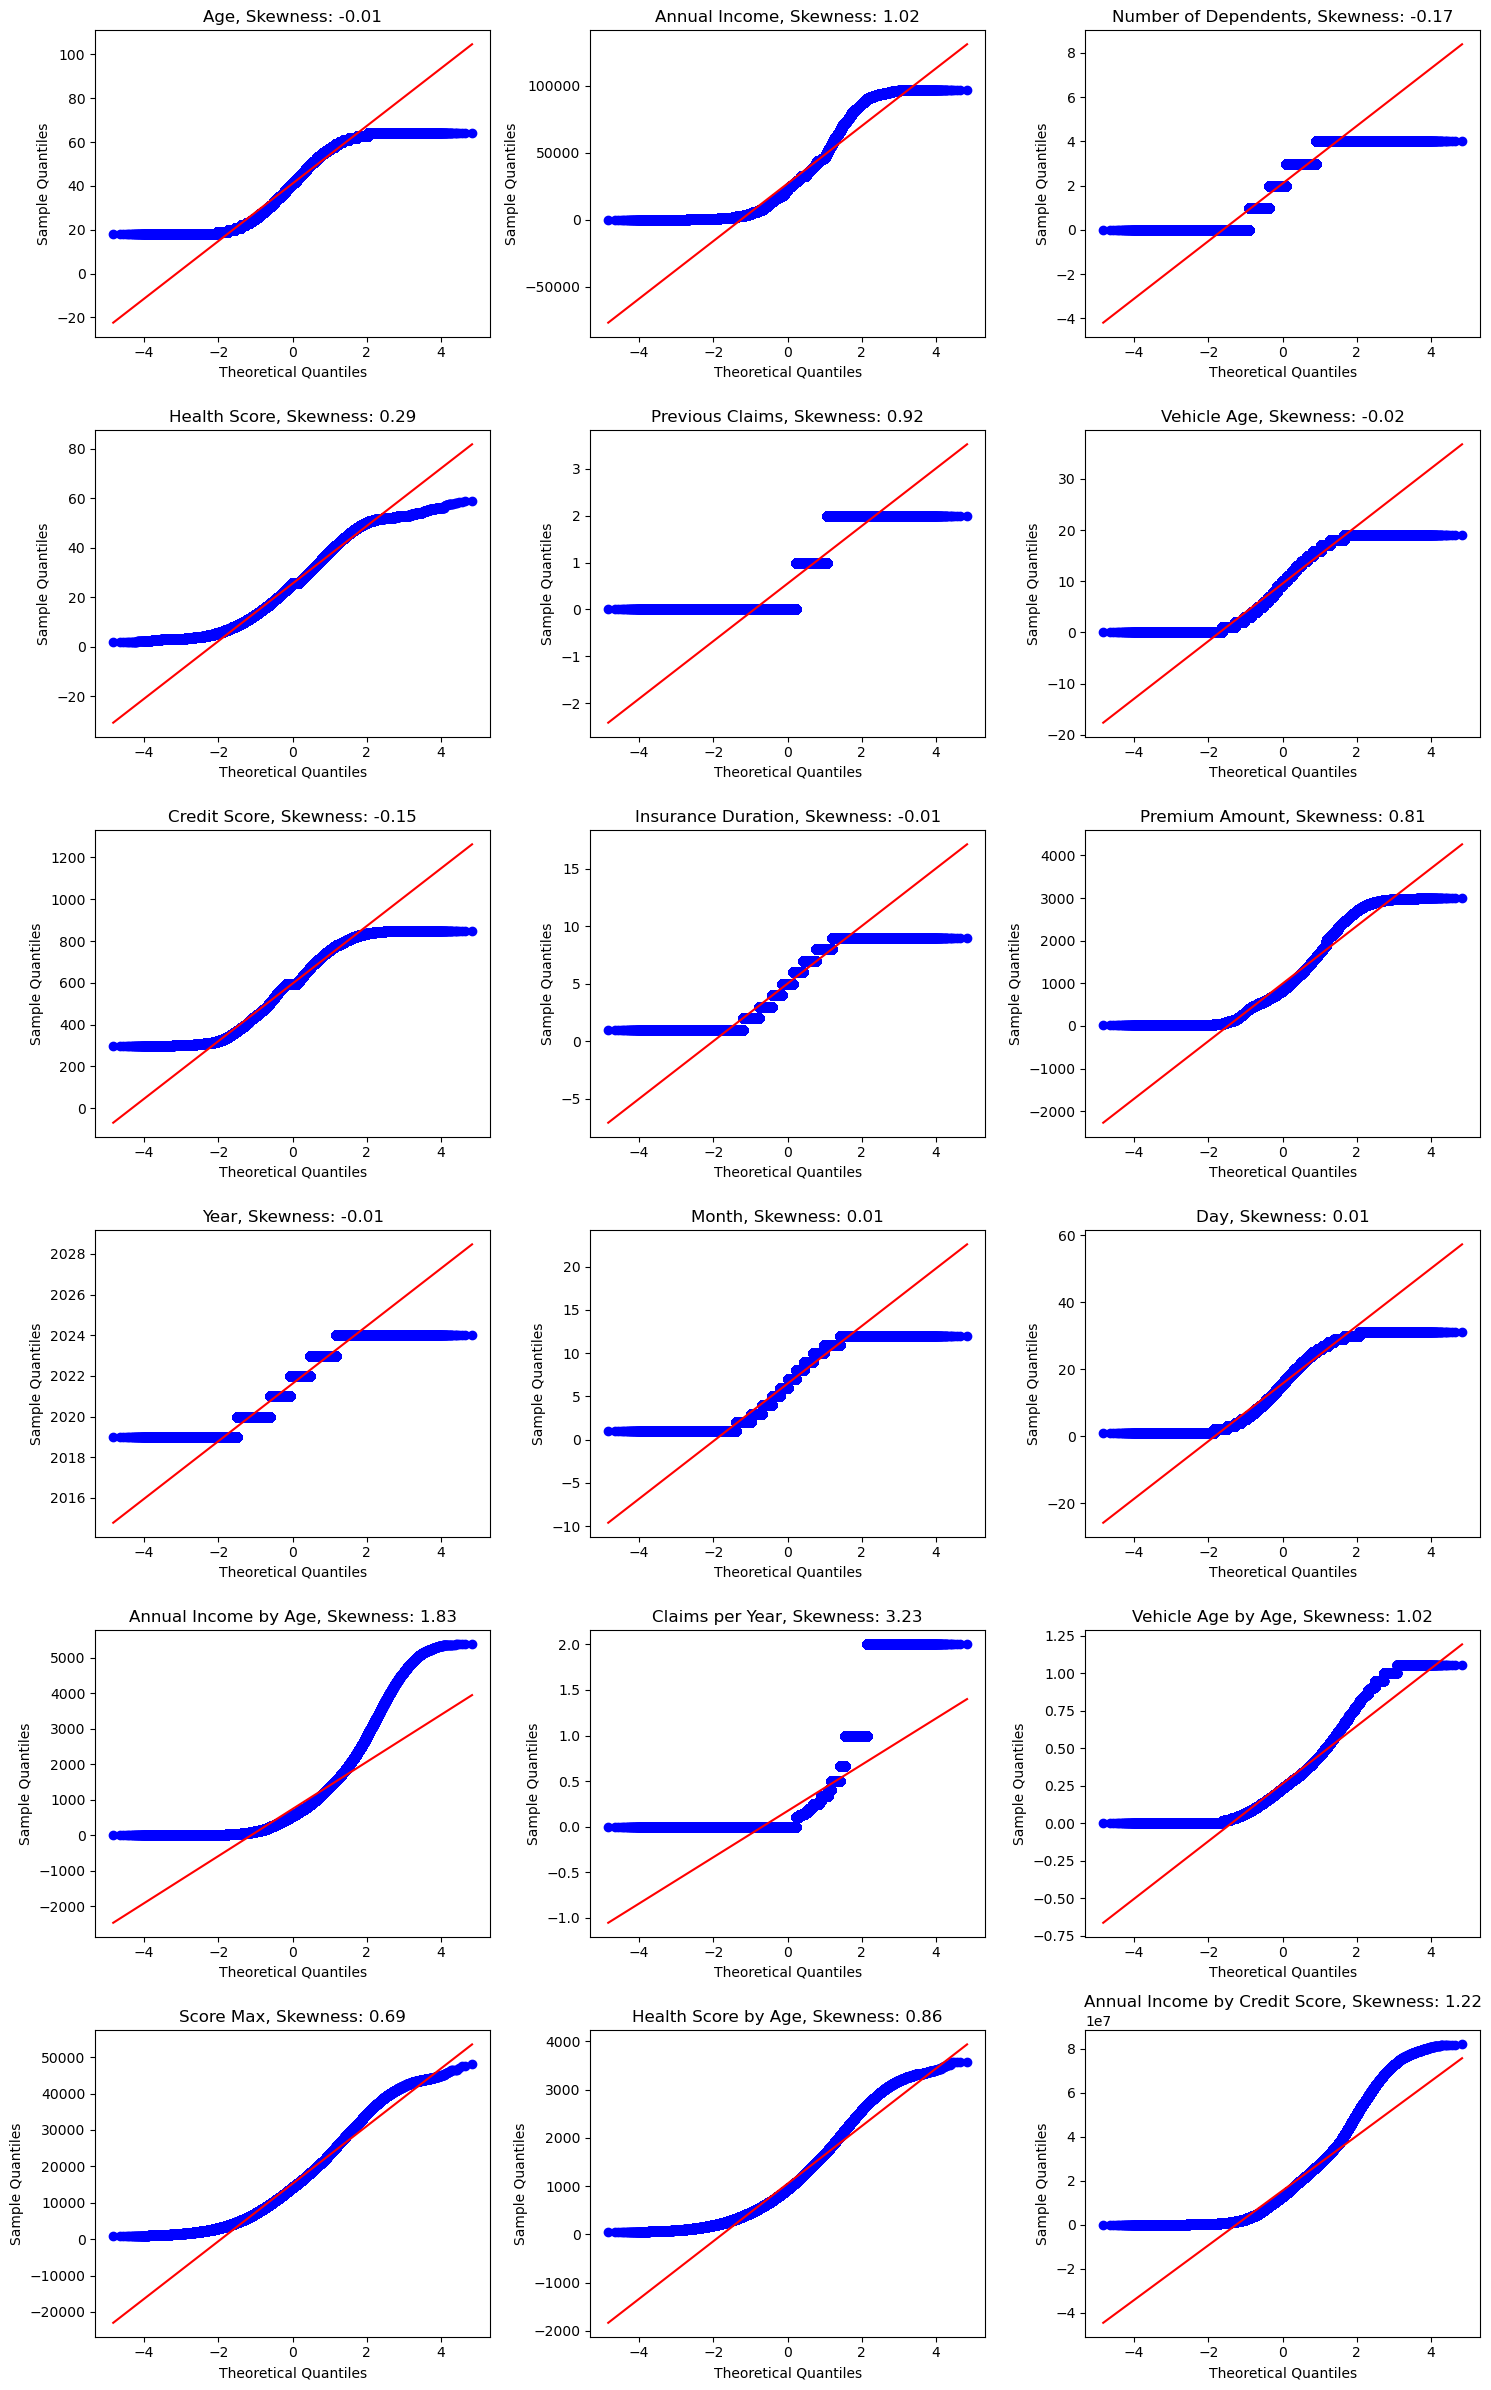

In [149]:
numerical_cols_train = train.select_dtypes(include=[np.number]).columns

# Set up figure size (3 columns per row)
n_cols = 3
n_rows = (len(numerical_cols_train) // n_cols) + (len(numerical_cols_train) % n_cols > 0)

plt.figure(figsize=(15, n_rows * 4))  # Increase figure height for better readability

# Loop through each numerical column and create QQ plot
for i, col in enumerate(numerical_cols_train, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Calculate skewness
    skewness = train[col].skew()
    
    # Create QQ plot for the column
    stats.probplot(train[col].dropna(), dist="norm", plot=plt)
    
    # Title with skewness value
    plt.title(f"{col}, Skewness: {skewness:.2f}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()

In [7]:
numerical_cols_train = train.select_dtypes(include=[np.number]).columns
numerical_cols_test = test.select_dtypes(include=[np.number]).drop(columns="id").columns

# Log transformation
train[numerical_cols_train] = train[numerical_cols_train].apply(np.sqrt)
test[numerical_cols_test] = test[numerical_cols_test].apply(np.sqrt)

* One-Hot Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = train.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop="first")  # Fix applied here

# Fit on training data and transform both train & test datasets
train_encoded = encoder.fit_transform(train[categorical_cols])
test_encoded = encoder.transform(test[categorical_cols])

# Convert back to DataFrame with proper column names
train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Reset indices to align with original datasets
train_encoded.index = train.index
test_encoded.index = test.index

# Concatenate encoded columns with original datasets (excluding original categorical columns)
train = pd.concat([train.drop(columns=categorical_cols), train_encoded], axis=1)
test = pd.concat([test.drop(columns=categorical_cols), test_encoded], axis=1)

Split Dataset

In [9]:
X = train.drop(['Premium Amount'], axis=1)
Y = train['Premium Amount']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 4. Modeling

Models used will be:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. XGBoost
5. LGBM

In [10]:
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, Y_train)
Y_pred = linreg_model.predict(X_test)
Y_pred = (Y_pred)**2 - 1

Y_test2 = (Y_test)**2 - 1

# Calculate RMSLE
linreg_rmsle = np.sqrt(mean_squared_log_error(Y_test2, Y_pred))
print("RMSLE:", round(linreg_rmsle, 4))

RMSLE: 1.0765


In [11]:
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge
ridgereg_model = Ridge(alpha=1.0)
ridgereg_model.fit(X_train, Y_train)
Y_pred = ridgereg_model.predict(X_test)
Y_pred = (Y_pred)**2 - 1

Y_test2 = (Y_test)**2 - 1

# Calculate RMSLE
ridgereg_rmsle = np.sqrt(mean_squared_log_error(Y_test2, Y_pred))
print("RMSLE:", round(ridgereg_rmsle, 4))

RMSLE: 1.0765


In [12]:
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Lasso
lassoreg_model = Lasso(alpha=1.0)
lassoreg_model.fit(X_train, Y_train)
Y_pred = lassoreg_model.predict(X_test)
Y_pred = (Y_pred)**2 - 1

Y_test2 = (Y_test)**2 - 1

# Calculate RMSLE
lassoreg_rmsle = np.sqrt(mean_squared_log_error(Y_test2, Y_pred))
print("RMSLE:", round(lassoreg_rmsle, 4))

RMSLE: 1.0771


In [13]:
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective="reg:squaredlogerror")
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
Y_pred = (Y_pred)**2 - 1

Y_test2 = (Y_test)**2 - 1

# Calculate RMSLE
xgb_rmsle = np.sqrt(mean_squared_log_error(Y_test2, Y_pred))
print("RMSLE:", round(xgb_rmsle, 4))

RMSLE: 1.0046


In [14]:
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, Y_train)
Y_pred = lgbm_model.predict(X_test)
Y_pred = (Y_pred)**2 - 1

Y_test2 = (Y_test)**2 - 1

# Calculate RMSLE
lgbm__rmsle = np.sqrt(mean_squared_log_error(Y_test2, Y_pred))
print("RMSLE:", round(lgbm__rmsle, 4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2235
[LightGBM] [Info] Number of data points in the train set: 824752, number of used features: 40
[LightGBM] [Info] Start training from score 29.321070
RMSLE: 1.034


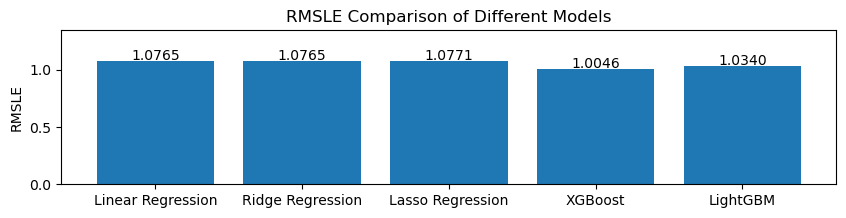

In [15]:
models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "XGBoost", "LightGBM"]
rmsle_values = [linreg_rmsle, ridgereg_rmsle, lassoreg_rmsle, xgb_rmsle, lgbm__rmsle]

# Plot bar chart
plt.figure(figsize=(10, 2))
plt.bar(models, rmsle_values)
plt.ylabel("RMSLE")
plt.title("RMSLE Comparison of Different Models")
plt.ylim(0, max(rmsle_values) * 1.25)  # Adjust y-axis for better visibility

# Show values on bars
for i, v in enumerate(rmsle_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

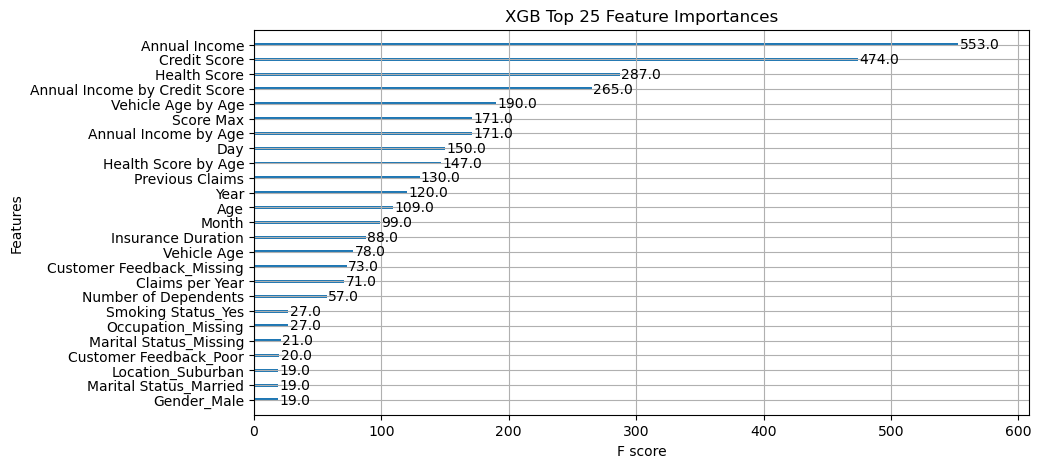

In [16]:
from xgboost import plot_importance

# Plot top 25 features by importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the figure size if needed
plot_importance(
    xgb_model,
    ax=ax,
    max_num_features=25,  # Display only the top 25 features
    importance_type="weight",  # Options: 'weight', 'gain', 'cover', 'total_gain', 'total_cover'
)
plt.title("XGB Top 25 Feature Importances")
plt.show()

## 5. Deployment

In [17]:
X2 = test.drop(['id'], axis=1)
Y2_pred = xgb_model.predict(X2)
Y2_pred = (Y2_pred)**2 - 1


submission = pd.DataFrame({
    "id": test["id"], 
    "Premium Amount": Y2_pred
})

submission.to_csv("submission.csv", index=False)

print(submission.head(5))

        id  Premium Amount
0  1200000      720.667664
1  1200001      779.421204
2  1200002      775.225098
3  1200003      761.690613
4  1200004      709.781921
